# Decision Tree Classifier

In [164]:
# Importacion de librerias
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


In [165]:
#Lectura del dataset
columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
# Se hace la division de las columnas para poder obtener los datos necesarios para hacer el entrenamiento y las pruebas
columnas = ["sepal length","sepal width","petal length","petal width"]
X = df[columnas]
Y = df['class']
print(Y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns

In [167]:
#Aplicando la separacion de los datos para el test, el train y la validacion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10) # 80% training and 20% test

In [168]:
#Se crea el arbol de decision donde se puede hacer modificaciones para los parametros
myTree1 = DecisionTreeClassifier(criterion="gini")
#Se entrena el Decision Tree Classifier
myTree1.fit(X_train, Y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
Y_pred1 = myTree1.predict(X_test)

In [169]:
#Aqui se puede visualizar el arbol creado pero en forma de texto
print(tree.export_text(myTree1))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_1 <= 2.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  2.65
|   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |--- feature_0 <= 6.15
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_0 >  6.15
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.8

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]

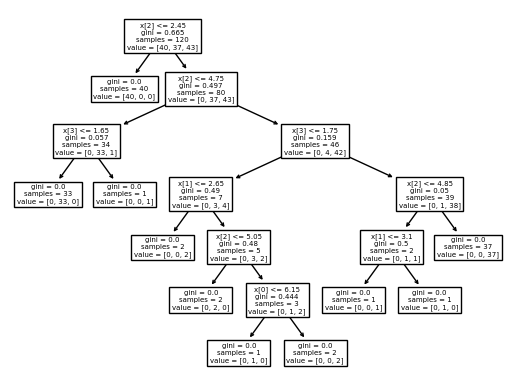

In [170]:
#Aqui se puede visualizar el arbol creado pero en forma de grafico
tree.plot_tree(myTree1)

Accuracy con los datos test

In [171]:
# Parametros Entropy
myTree1.score(X_test, Y_test)

0.9666666666666667

In [172]:
# Evaluacion del modelo entrenado 
Y_pred_test = myTree1.predict(X_test)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
confusion_matrix_test = confusion_matrix(Y_test, Y_pred_test)
f1_score_test = f1_score(Y_test, Y_pred_test, average='weighted')

In [173]:
print("Accuracy:", accuracy_test)
print("F1 Score:", f1_score_test)
print("Matriz de confusion: \n", confusion_matrix_test)

Accuracy: 0.9666666666666667
F1 Score: 0.9671111111111111
Matriz de confusion: 
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


Arbol 2

In [174]:
#Se crea el arbol de decision donde se puede hacer modificaciones para los parametros
myTree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3)
#Se entrena el Decision Tree Classifier
myTree2.fit(X_train, Y_train)
#Aqui se predice la respuesta para el subset de datos de prueba (test)
Y_pred2 = myTree2.predict(X_test)

In [175]:
print(tree.export_text(myTree2))

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_2 <= 5.15
|   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  5.15
|   |   |   |--- class: Iris-virginica



[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.582\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 0.996\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[2] <= 5.15\nentropy = 0.426\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.125, 'entropy = 0.787\nsamples = 17\nvalue = [0, 4, 13]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

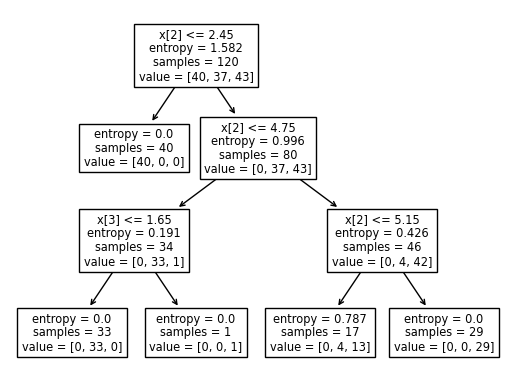

In [176]:
tree.plot_tree(myTree2)

In [177]:
#Parametros con Gini y Max_depth 3
myTree2.score(X_test, Y_test)

0.9333333333333333

In [178]:
# Evaluacion del modelo entrenado 
Y_pred_test2 = myTree2.predict(X_test)
accuracy_test2 = accuracy_score(Y_test, Y_pred_test)
confusion_matrix_test2 = confusion_matrix(Y_test, Y_pred_test)
f1_score_test2 = f1_score(Y_test, Y_pred_test, average='weighted')

In [179]:
print("Accuracy:", accuracy_test2)
print("F1 Score:", f1_score_test2)
print("Matriz de confusion: \n", confusion_matrix_test2)

Accuracy: 0.9666666666666667
F1 Score: 0.9671111111111111
Matriz de confusion: 
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


Ahora sigue realizar algunos cambios a los arboles con el fin de buscar que nos den resultados diferentes a los anteriormente ya obtenidos


In [180]:
# Se hace nuevamente la division de los datos para tener training, test y ahora tambien se le agregara validacion

X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size = 0.2, random_state = 30)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 30)


In [193]:
myTree_valid.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [195]:
#Nota: esta celda se corta porque marca un error al llamar a "tree.DecisionTreeClassifier(criterion="gini")", pero si se corre el resto de lineas al parecer si funciona, no sabria decir a ciencia cierta porque no funciona o porque marca el error
myTree_valid = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
myTree_valid.fit(X_train, Y_train)
Y_predic_valid = myTree_valid(X_temp)


TypeError: 'DecisionTreeClassifier' object is not callable

In [196]:
print(tree.export_text(myTree_valid))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



[Text(0.4, 0.875, 'x[3] <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.4, 0.375, 'x[2] <= 4.95\nentropy = 0.433\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.2, 0.125, 'entropy = 0.169\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.6, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

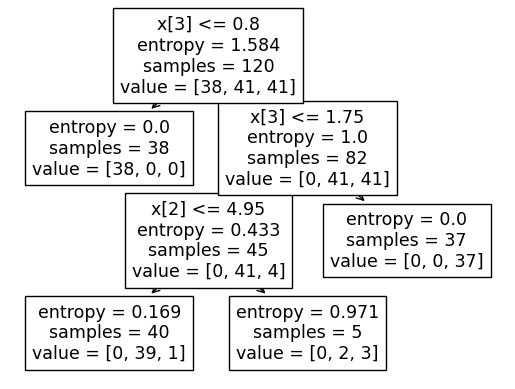

In [197]:
tree.plot_tree(myTree_valid)

In [198]:
#Evaluacion con la validacion
Y_pred_valid = myTree.predict(X_valid)
accuracy_valid = accuracy_score(Y_valid, Y_pred_valid)
confusion_matrix_valid = confusion_matrix(Y_valid, Y_pred_valid)
f1_score_valid = f1_score(Y_valid, Y_pred_valid, average='weighted')

In [200]:
print("Accuracy:", accuracy_valid)
print("F1 Score:", f1_score_valid)
print("Matriz de confusion: \n", confusion_matrix_valid)

Accuracy: 0.9333333333333333
F1 Score: 0.9333333333333333
Matriz de confusion: 
 [[6 0 0]
 [0 4 1]
 [0 0 4]]


Al realizar las dos primeras pruebas, donde el primer arbol contenia un criterio de gini, y el segundo arbol contenia de parametros como creiterio entropy y max_depth = 3.

myTree1 -- criterion = "gini"
- Accuracy: 0.93
- F1-score: 0.93
Matriz de confucion:
[[6 0 0]
 [0 4 0]
 [0 1 4]]

myTree2 -- criterion = "entropy" y max_depth = 3
- Accuracy: 0.97
- F1-score: 0.97
Matriz de confucion:
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


myTree_valid -- criterion = "entropy" y max_depth = 3
- Accuracy: 0.93
- F1-score: 0.93
Matriz de confucion:
[[6 0 0]
 [0 4 1]
 [0 0 4]]

Lo que podemos concluir de esto es con la validacion es que se tiene un sego bajo, que en otras palabras se puede decir que se tiene un ajuste buen de los datos, aunque aun se puede mejorar para que el modelo sea aun mas preciso. Tampoco se puede considerar que el modelo tenga ni Overfitting ni Underfitting, ya que al igual en lo anterior explicado, los datos son buenos aunque existe margen de mejora.